# Problem Set 4

In [2]:
import numpy as np
import pandas as pd
import random

import sklearn.model_selection as model_selection
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_predict, cross_validate
from sklearn import linear_model


import matplotlib.pyplot as plt
%matplotlib inline

## Problem A: Import 10000 records from the NYC yellow cab data set
Import 100 records from the NYC yellow cab data set. We're going to be looking at the relationship between trip distance and tip amount. Are passengers fwho travel further tipping better than others?

Our first task is to import and clean the data. Import the first 10000 rows of the Jan 2017 yellow cab NYC trip data into a pandas data frame. Create a view on trip_distance and tip_amount. Plot the trip_distance vs. tip amount in a scatter plot.

The data set can be found here:
<http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml>

<AxesSubplot:xlabel='trip_distance', ylabel='tip_amount'>

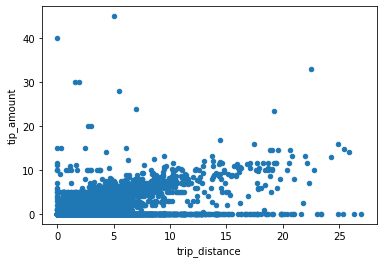

In [3]:
df1 = pd.read_csv("yellow_tripdata_2017-01.csv", nrows=10000)
df1 = df1[['trip_distance','tip_amount']]
df1.plot(x='trip_distance', y='tip_amount', kind='scatter')
# IMPLEMENT ME (Please make sure you name the dataframe as 'df1' and don't modify 'df1' in later parts.)
# (Read your data from "yellow_tripdata_2017-01.csv".)

## Problem B: Remove the people who tipped nothing
People who tipped nothing aren't very useful for our needs. We are interesteded in how much they tipped when they were generous enough to do so. Similarly, we don't care about people that tipped for very short rides. Remove all records where the trip distance was less than 0.5 miles. Create a data frame with the records of zero (or less) tips removed and plot the relationship between the trip distance and the tip amount. Can  the resulting data frame 'df'.

<AxesSubplot:xlabel='trip_distance', ylabel='tip_amount'>

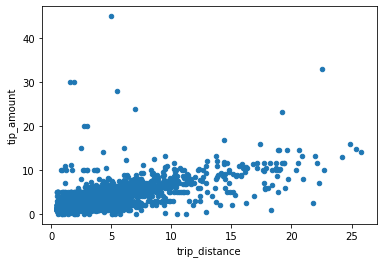

In [4]:
df2 = df1[df1.tip_amount > 0]
df2 = df2[df2.trip_distance >= 0.5]
df2.plot(x='trip_distance', y='tip_amount', kind='scatter')
# IMPLEMENT ME (Please make sure you name the dataframe as 'df2' and don't modify 'df2' in later parts.)

# Problem C: Fit a linear regression to the resulting trip_distance vs. tip_amount data

In [5]:
X = df2['trip_distance'].values.reshape(-1,1)
y = df2['tip_amount']

In [6]:
linreg=LinearRegression(fit_intercept=False)
linreg.fit(X,y)
# IMPLEMENT ME

LinearRegression(fit_intercept=False)

## Problem D: Look at the regression coefficients
Print the regression coefficients (intercept and slope) and in a markdown cell comment about their values. Do they make sense? What do they tell you?

In [7]:
a = linreg.intercept_
b = linreg.coef_
print(linreg.intercept_)
print(linreg.coef_)

# Intercept = 0 means that the regression line passes through the origin, which implies that when trip_distance has a value of zero, tip_amount will also have a value of zero.
# Coefficient = 0.75 means that there's a strong positive relationship between trip_distance and tip_amount. For every one-unit increase in trip_distance, tip_amount is expected to increase by 0.75 units.
# The values make sense. 

#IMPLEMENT ME (Save the value of intercept as 'a' and the value of slope as 'b'.
# Make sure you only save the value of slope as 'b' instead of an array.)

0.0
[0.75488055]


## Problem E: Evaluate the model
Just because the model fit the data set doesn't mean it's very predictive. Run a 10-fold cross-validation and compute the average mean absolute deviation. Show the result. In a markdown cell comment on what that number means in terms of predictive accuracy.

In [8]:
random.seed(5)
# IMPLEMENT ME (Save the computed average mean absolute deviation as 'c'.)

In [9]:
scores = cross_validate(linreg, X, y, cv=10, scoring='neg_mean_absolute_error', return_train_score=False)
scores

{'fit_time': array([0.00129485, 0.0006249 , 0.00047898, 0.00043106, 0.00064087,
        0.00067282, 0.00076914, 0.00045705, 0.000422  , 0.0005281 ]),
 'score_time': array([0.00033307, 0.00043917, 0.00015211, 0.00013685, 0.00016093,
        0.00029397, 0.0003159 , 0.00018215, 0.00014591, 0.00017405]),
 'test_score': array([-1.15129123, -1.15221067, -1.06482996, -1.17763592, -1.18436327,
        -1.12621706, -1.26931772, -1.17332318, -1.12258117, -1.09283656])}

In [10]:
c = np.mean(-1*scores['test_score'])
print(c)

1.1514606734157744


In [11]:
#The average mean absolute deviation of 1.15 means that the absolute difference between the predicted values and the actual values of target tip_amount is 1.15 units on average.
#In this case, MAE=1.15 is relatively acceptable.